In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from osgeo import gdal
import subprocess
import re
plt.style.use('ggplot')

left, right, bot, top = -118.21, -117.78, 33.69, 34.05

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# Lower right part
raster = gdal.Open('USGS_NED_13_n34w118_IMG.img')
geotransform = raster.GetGeoTransform()
originX = geotransform[0]  # Left upper corner
pixelWidth = geotransform[1]
pixelRotateX = geotransform[2]  # Rotation
originY = geotransform[3]
pixelRotateY = geotransform[4]  # Rotation
pixelHeight = geotransform[5]
band = raster.GetRasterBand(1)

p = subprocess.Popen('grep -hnr "_Bounding_Coordinate" USGS_NED_13_n34w118_IMG_meta.txt | cut -d ":" -f 3', shell=True,
                stdout=subprocess.PIPE)
lines = p.stdout.readlines()
west, east, north, south = (float(re.findall(r'-*\d+.\d+', line.decode('UTF-8'))[0]) for line in lines)
print(f"The boudnaries are WENS: {west}, {east}, {north}, {south}")

arr = np.array(band.ReadAsArray())
arr[arr<-200] = -200
nx, ny = arr.shape
lat = np.arange(ny) * pixelHeight + originY
lon = np.arange(nx) * pixelWidth + originX

print(nx, ny)
print(np.min(arr), np.max(arr))
print(geotransform)

id_lat = np.argwhere(lat>=bot)
id_lon = np.argwhere(lon<=right)
arr1 = arr[id_lat[0][0]: id_lat[-1][0], id_lon[0][0] : id_lon[-1][0]]

The boudnaries are WENS: -118.000555556, -116.999444444, 34.0005555558, 32.9994444436
10812 10812
-200.0 1731.7445
(-118.000555555894, 9.259259269219378e-05, 0.0, 34.0005555557951, 0.0, -9.259259269220364e-05)


In [5]:
print(-118.000555555894 + 9.259259269219378e-05 * 10812)

print(lon.min(), lon.max())

-116.999444443706
-118.000555555894 -116.99953703629869


In [6]:
# Lower left part
raster = gdal.Open('USGS_NED_13_n34w119_IMG.img')
geotransform = raster.GetGeoTransform()
originX = geotransform[0]  # Left upper corner
pixelWidth = geotransform[1]
pixelRotateX = geotransform[2]  # Rotation
originY = geotransform[3]
pixelRotateY = geotransform[4]  # Rotation
pixelHeight = geotransform[5]
band = raster.GetRasterBand(1)
print(f"Geotransform information: {geotransform}")

arr = np.array(band.ReadAsArray())
arr[arr<-200] = -200
nx, ny = arr.shape
lat = np.arange(ny) * pixelHeight + originY
lon = np.arange(nx) * pixelWidth + originX
print(f"Shape of arr: {nx}, {ny}")
print(f"Min elev = {np.min(arr)}, Max elev = {np.max(arr)}")


id_lat = np.argwhere(lat>=bot)
id_lon = np.argwhere(np.logical_and(west>lon, lon>=left))
arr2 = arr[id_lat[0][0]: id_lat[-1][0], id_lon[0][0] : id_lon[-1][0]]
print(f"Shape of cropped arr: {np.shape(arr2)}")

Geotransform information: (-119.000555556593, 9.259259277534279e-05, 0.0, 34.0005555557951, 0.0, -9.259259269220364e-05)
Shape of arr: 10812, 10812
Min elev = -200.0, Max elev = 640.6234741210938
Shape of cropped arr: (3353, 2261)


In [7]:
# Upper left part
raster = gdal.Open('USGS_NED_13_n35w119_IMG.img')
geotransform = raster.GetGeoTransform()
originX = geotransform[0]  # Left upper corner
pixelWidth = geotransform[1]
pixelRotateX = geotransform[2]  # Rotation
originY = geotransform[3]
pixelRotateY = geotransform[4]  # Rotation
pixelHeight = geotransform[5]
band = raster.GetRasterBand(1)
print(f"Geotransform information: {geotransform}")

arr = np.array(band.ReadAsArray())
arr[arr<-200] = -200
nx, ny = arr.shape
lat = np.arange(ny) * pixelHeight + originY
lon = np.arange(nx) * pixelWidth + originX

print(f"Shape of arr: {nx}, {ny}")
print(f"Min elev = {np.min(arr)}, Max elev = {np.max(arr)}")

id_lat = np.argwhere(np.logical_and(north<lat, lat<=top))
id_lon = np.argwhere(np.logical_and(west>lon, lon>=left))
arr3 = arr[id_lat[0][0]: id_lat[-1][0], id_lon[0][0] : id_lon[-1][0]]
print(f"Shape of cropped arr: {np.shape(arr3)}")

Geotransform information: (-119.000555556593, 9.259259277534279e-05, 0.0, 35.0005555564946, 0.0, -9.259259277537894e-05)
Shape of arr: 10812, 10812
Min elev = -200.0, Max elev = 2443.4365234375
Shape of cropped arr: (533, 2261)


In [8]:
# Upper right part
raster = gdal.Open('USGS_NED_13_n35w118_IMG.img')
geotransform = raster.GetGeoTransform()
originX = geotransform[0]  # Left upper corner
pixelWidth = geotransform[1]
pixelRotateX = geotransform[2]  # Rotation
originY = geotransform[3]
pixelRotateY = geotransform[4]  # Rotation
pixelHeight = geotransform[5]
band = raster.GetRasterBand(1)
print(f"Geotransform information: {geotransform}")

arr = np.array(band.ReadAsArray())
arr[arr<-200] = -200
nx, ny = arr.shape
lat = np.arange(ny) * pixelHeight + originY
lon = np.arange(nx) * pixelWidth + originX

print(f"Shape of arr: {nx}, {ny}")
print(f"Min elev = {np.min(arr)}, Max elev = {np.max(arr)}")

id_lat = np.argwhere(np.logical_and(north<lat, lat<=top))
id_lon = np.argwhere(lon<=right)
arr4 = arr[id_lat[0][0]: id_lat[-1][0], id_lon[0][0] : id_lon[-1][0]]
print(f"Shape of cropped arr: {np.shape(arr4)}")

Geotransform information: (-118.000555555894, 9.259259269219378e-05, 0.0, 35.0005555564946, 0.0, -9.259259277537894e-05)
Shape of arr: 10812, 10812
Min elev = 53.8399772644043, Max elev = 3068.190185546875
Shape of cropped arr: (533, 2382)


[4006.   4547.   -118.2  -117.78   33.68   34.05]
432 432


Text(0, 0.5, 'Elevation (m)')

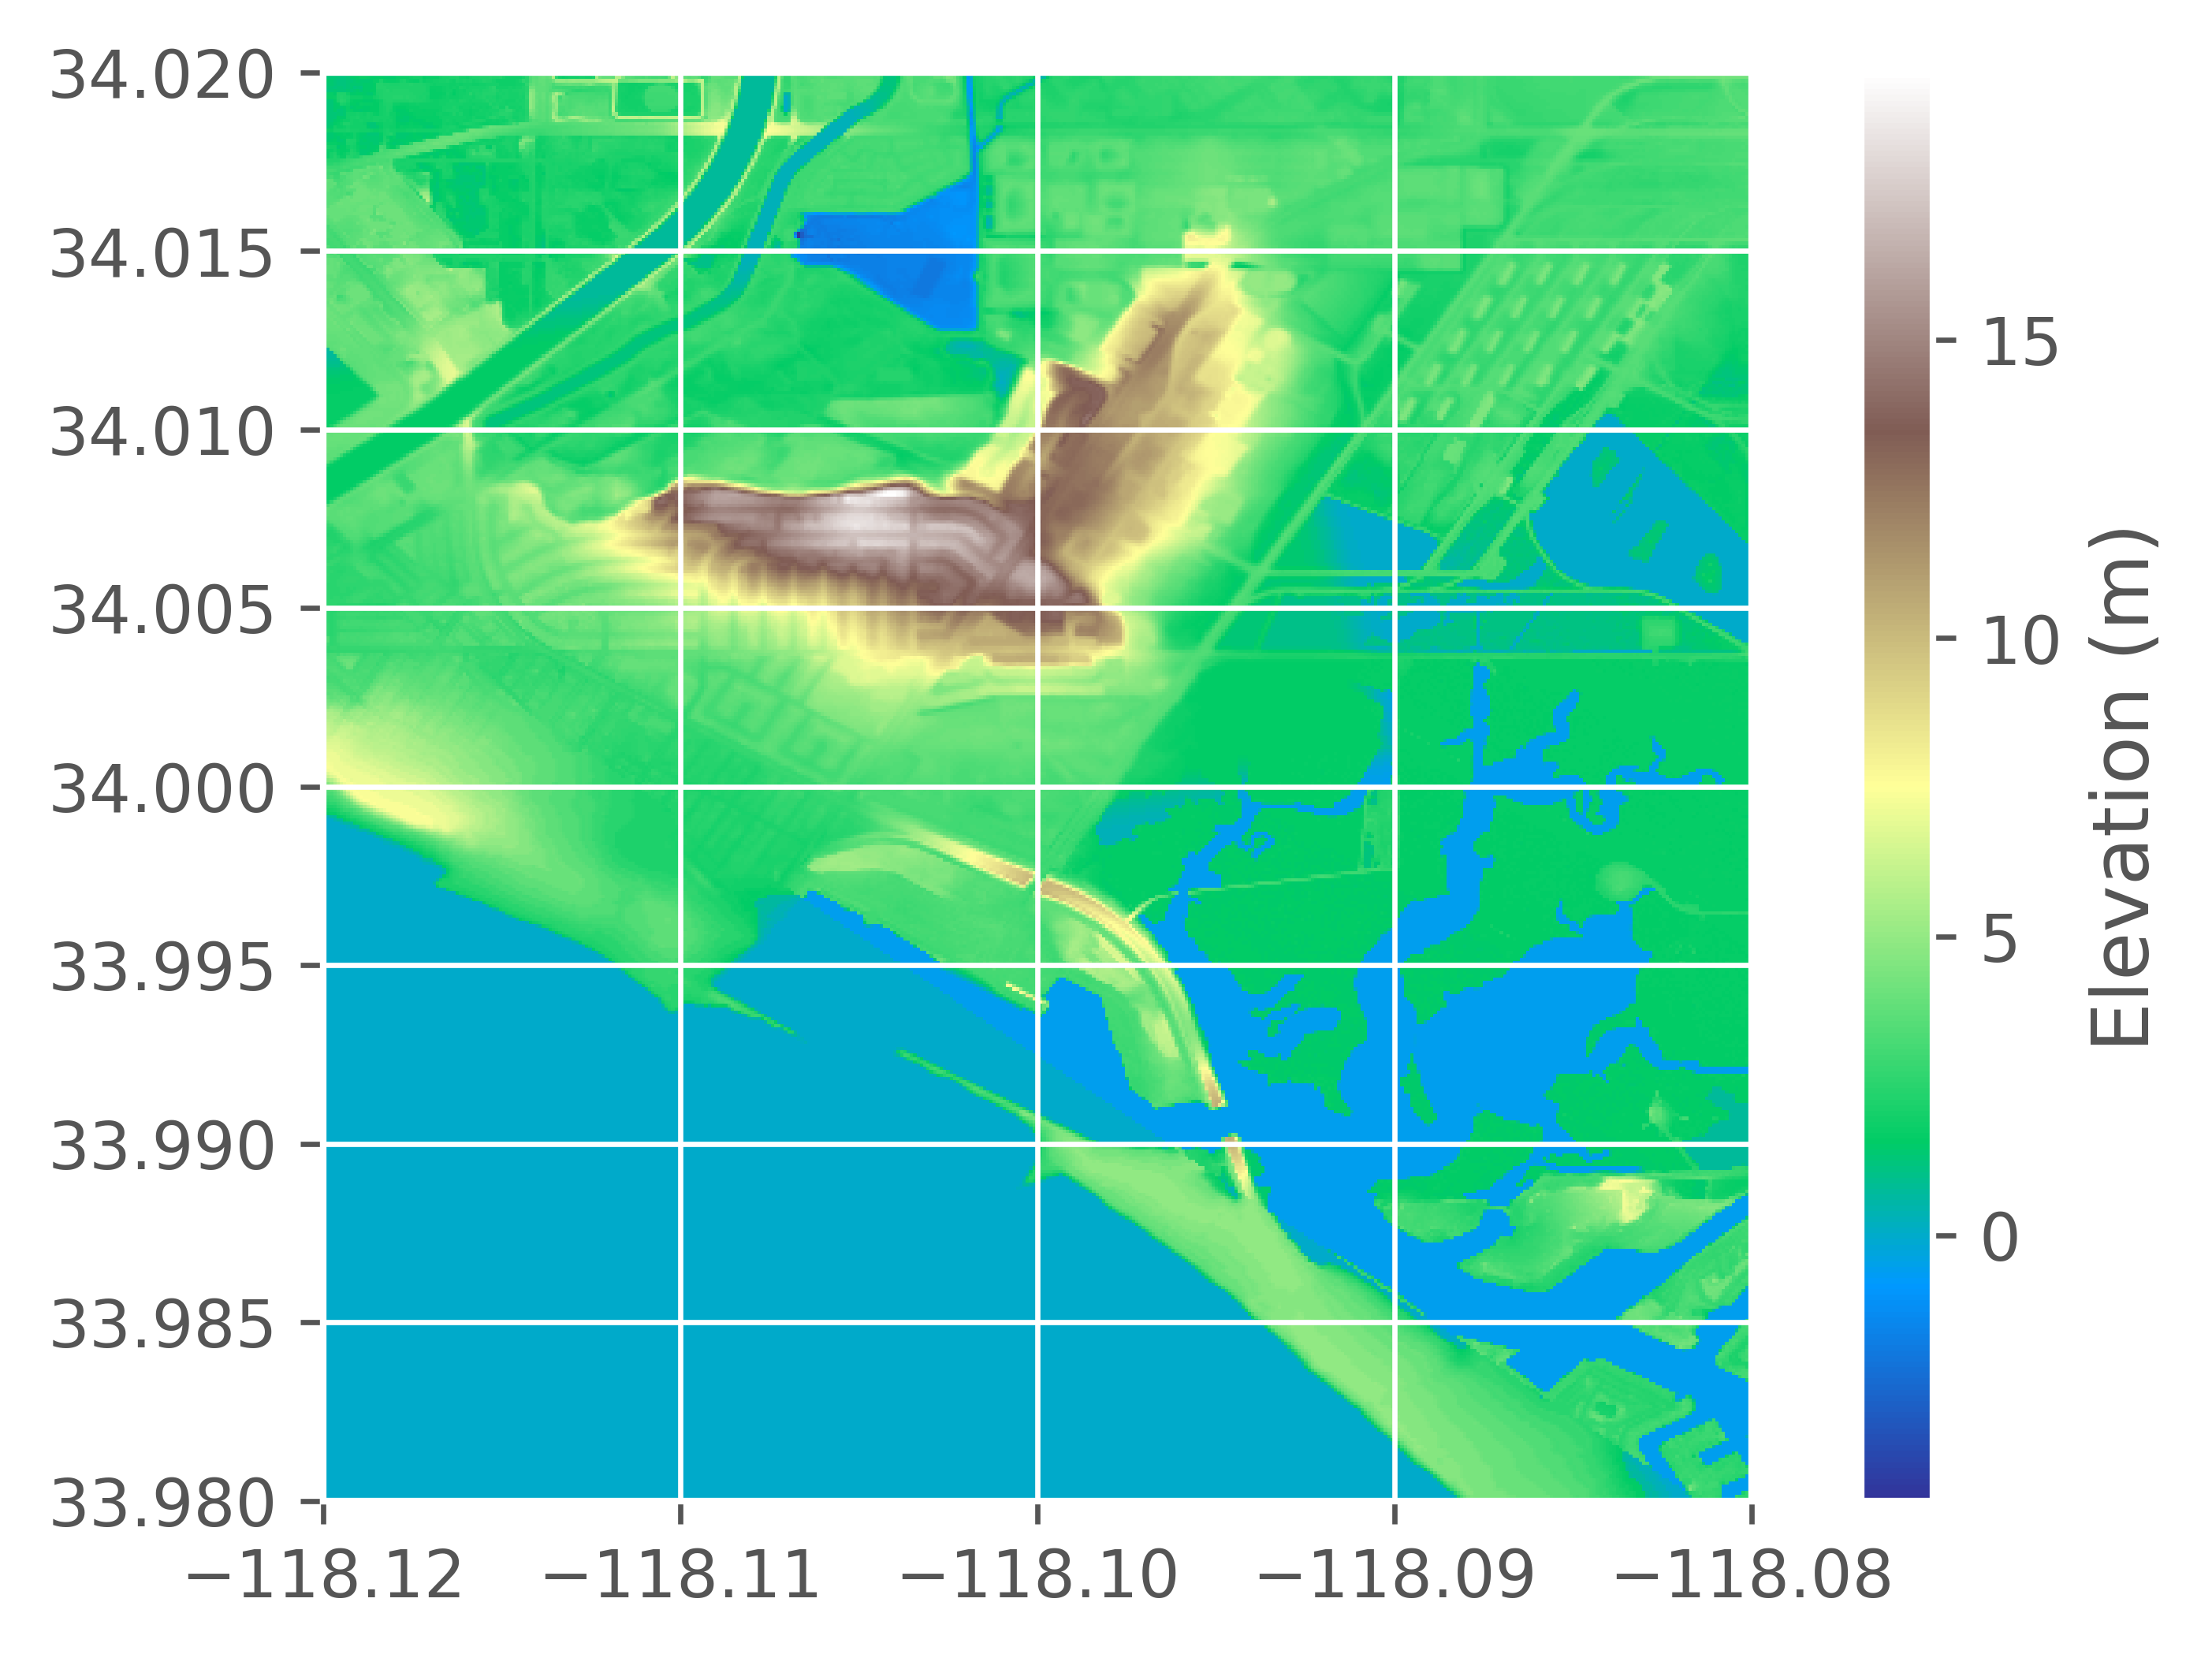

In [72]:
dem_head = np.genfromtxt('DEM_LaHabra_small_0.33sec_overlap.txt', dtype='float')
print(dem_head)
NY, NX = int(dem_head[0]), int(dem_head[1])
dem = np.fromfile('DEM_LaHabra_small_0.33sec_overlap.bin', dtype='float32').reshape(NY, NX)

fig, ax = plt.subplots(dpi=600)
id_lat = np.argwhere(np.logical_and(lat>33.98, lat<34.02))
id_lon = np.argwhere(np.logical_and(lon>-118.12, lon<-118.08))
print(len(id_lat), len(id_lon))
plt.imshow(dem[id_lat[0][0]: id_lat[-1][0], id_lon[0][0] : id_lon[-1][0]], cmap='terrain', 
           extent=[-118.12, -118.08, 33.98, 34.02])
cb = plt.colorbar()
cb.ax.set_ylabel('Elevation (m)')

In [9]:
dem = np.vstack((np.hstack((arr3, arr4)), np.hstack((arr2, arr1))))
ny, nx = np.shape(dem)
lon = np.linspace(left, right, nx)
lat = np.linspace(bot, top, ny)
#dem = np.fromfile('DEM_LaHabra_small_0.33sec.bin', dtype='float32')
print(f'Shape of DEM: {np.shape(dem)}')
print(f"Min elev = {np.min(dem)}, Max elev = {np.max(dem)}")
dem.astype('float32').tofile('DEM_LaHabra_small_0.33sec.bin')
np.savetxt('DEM_LaHabra_small_0.33sec.txt', list(dem.shape) + [left, right, bot, top])

Shape of DEM: (3886, 4643)
Min elev = -200.0, Max elev = 459.4508972167969


In [21]:
def foo(s, k):
    
    l = len(s) - k
    
    # A decrease stack, with at most k elements poped
    stack = []
    for c in s:
        while stack and stack[-1] > c and l > 0:
            stack.pop()
            l -= 1
        stack.append(c)
        
    return "".join(stack[:k])
    
    
print(foo('abrfafdsafergq', 2))
print(foo('dd', 6))

aa
dd


In [11]:
print(lat.shape, lon.shape, np.min(lon), np.max(lon))

(3886,) (4643,) -118.21 -117.78


648
-118.21 648


Text(0, 0.5, 'Elevation (m)')

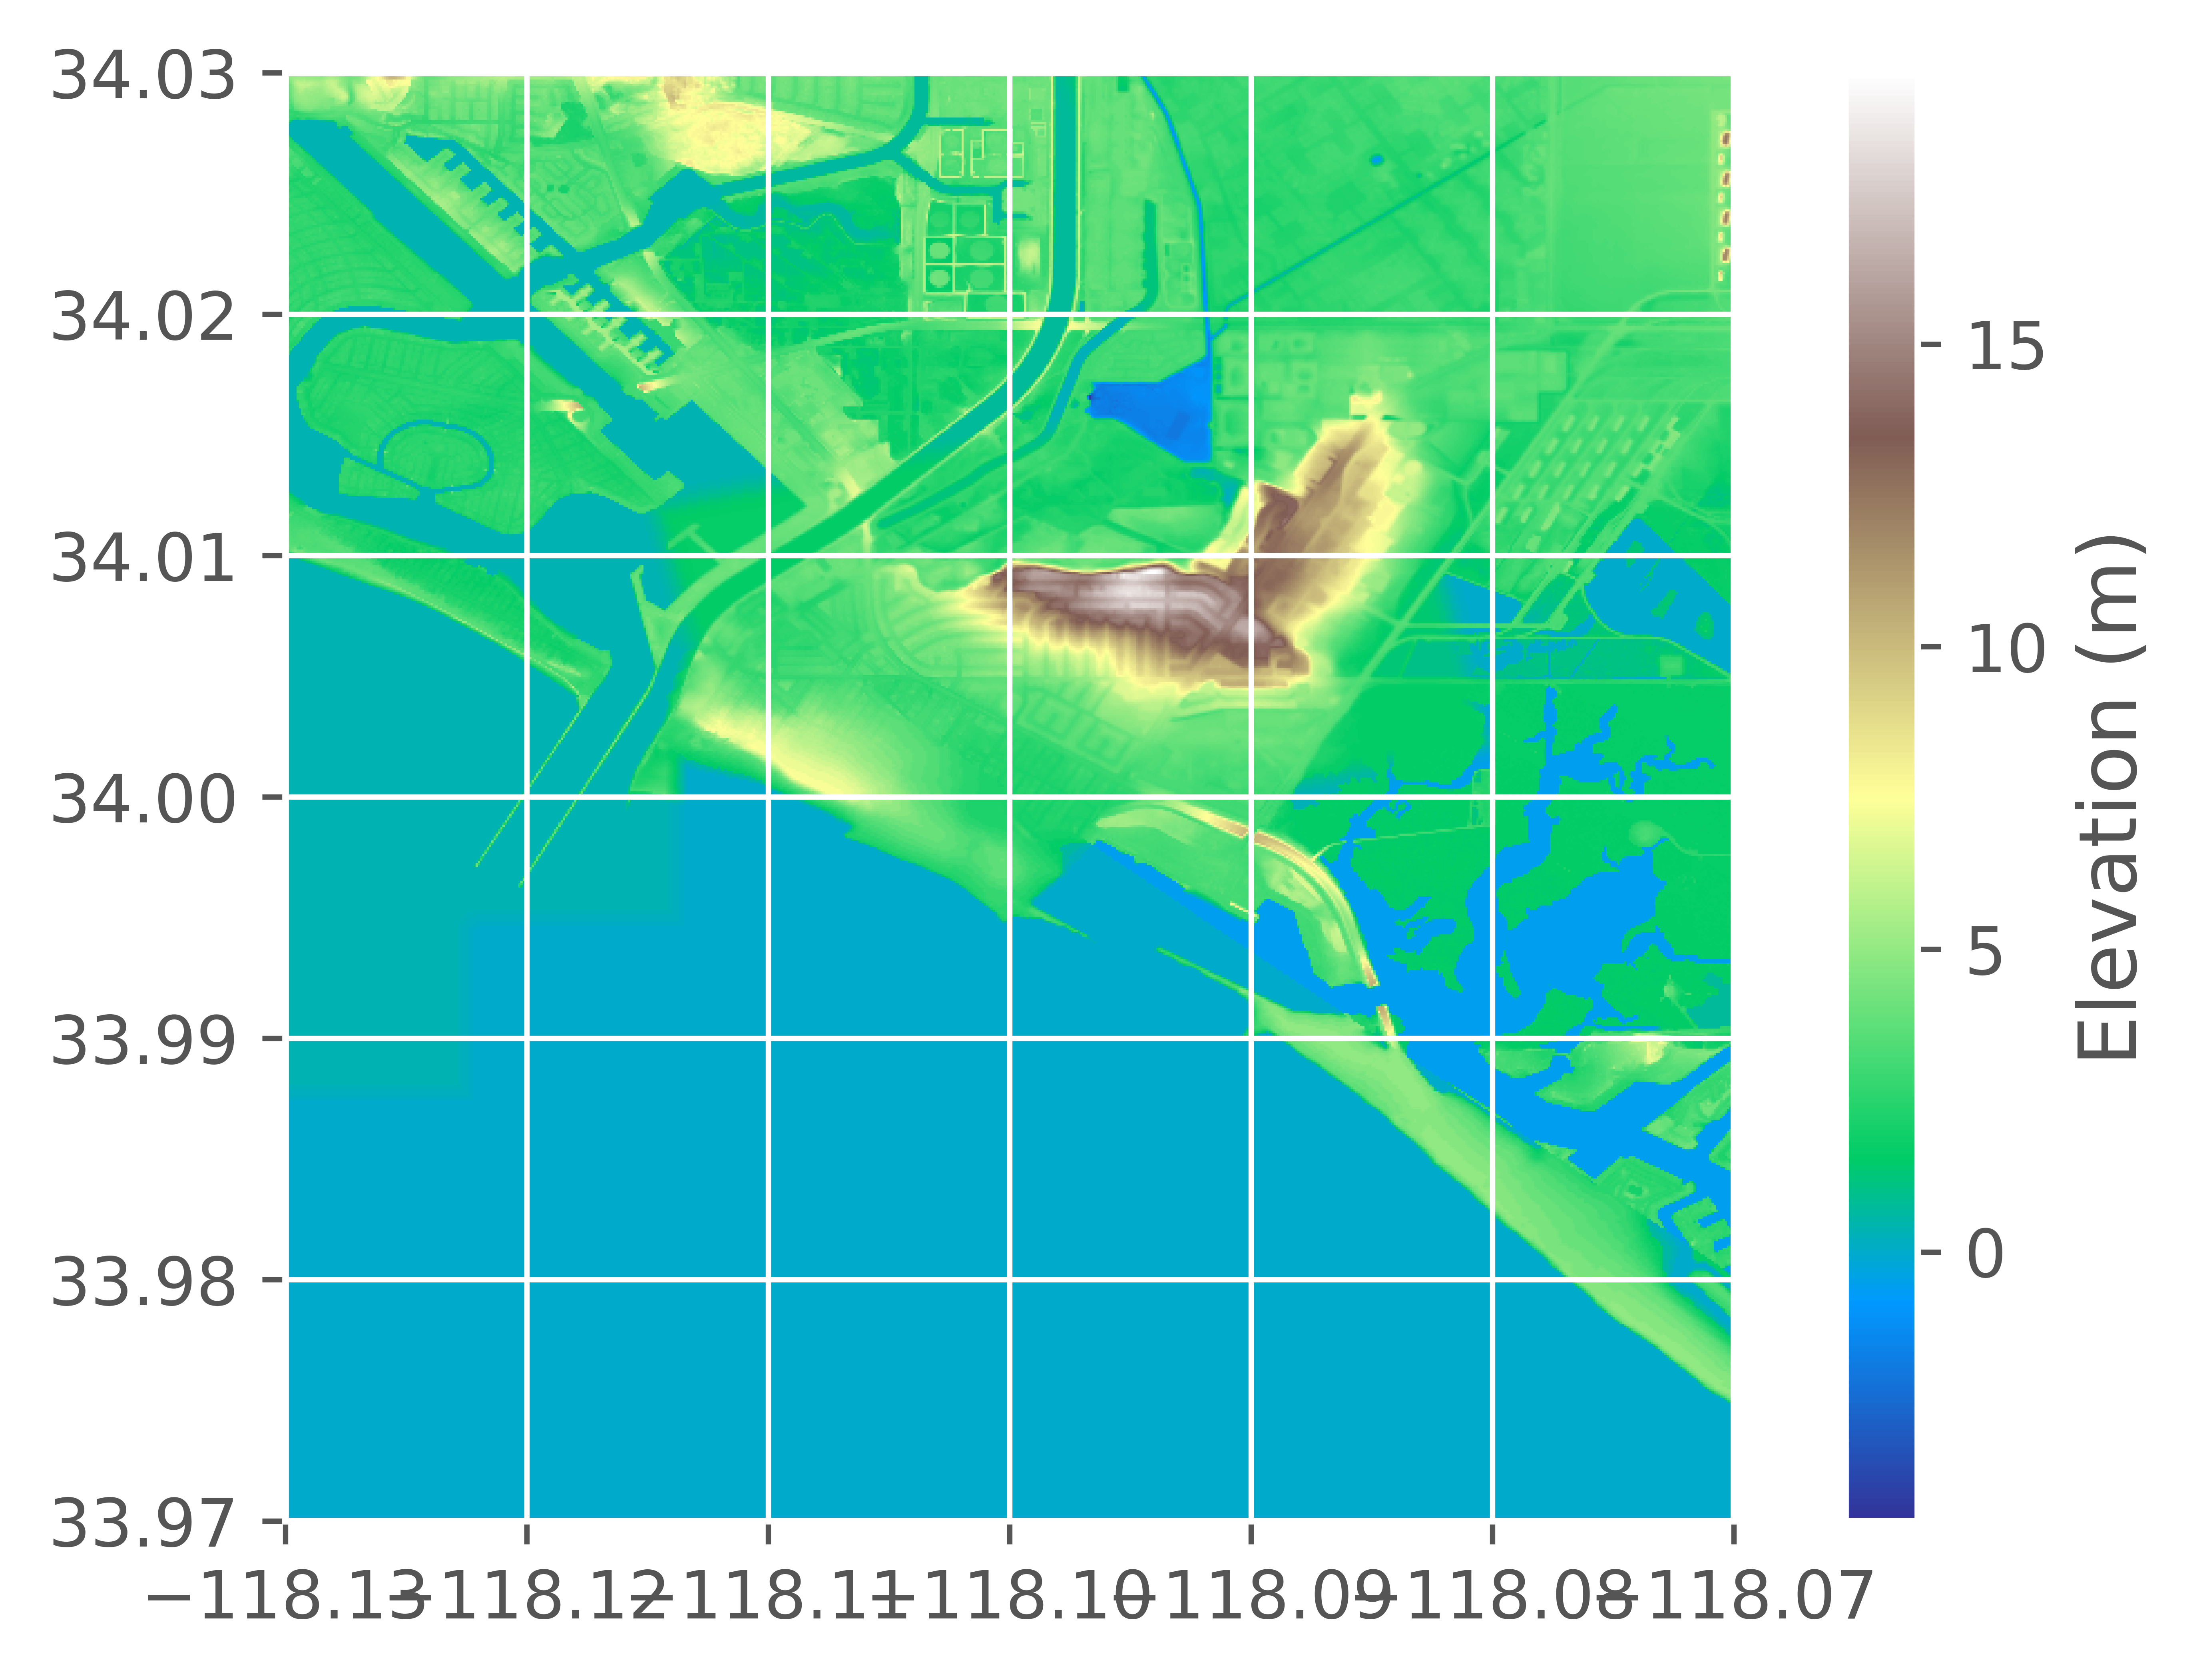

In [15]:
fig, ax = plt.subplots(dpi=600)
id_lat = np.argwhere(np.logical_and(lat>33.97, lat<34.03))
id_lon = np.argwhere(np.logical_and(lon>-118.13, lon<-118.07))
print(len(id_lat))
print(np.min(lon), len(id_lon))
plt.imshow(dem[id_lat[0][0]: id_lat[-1][0], id_lon[0][0] : id_lon[-1][0]], cmap='terrain', 
           extent=[-118.13, -118.07, 33.97, 34.03])
cb = plt.colorbar()
cb.ax.set_ylabel('Elevation (m)')

Text(0, 0.5, 'Elevation (m)')

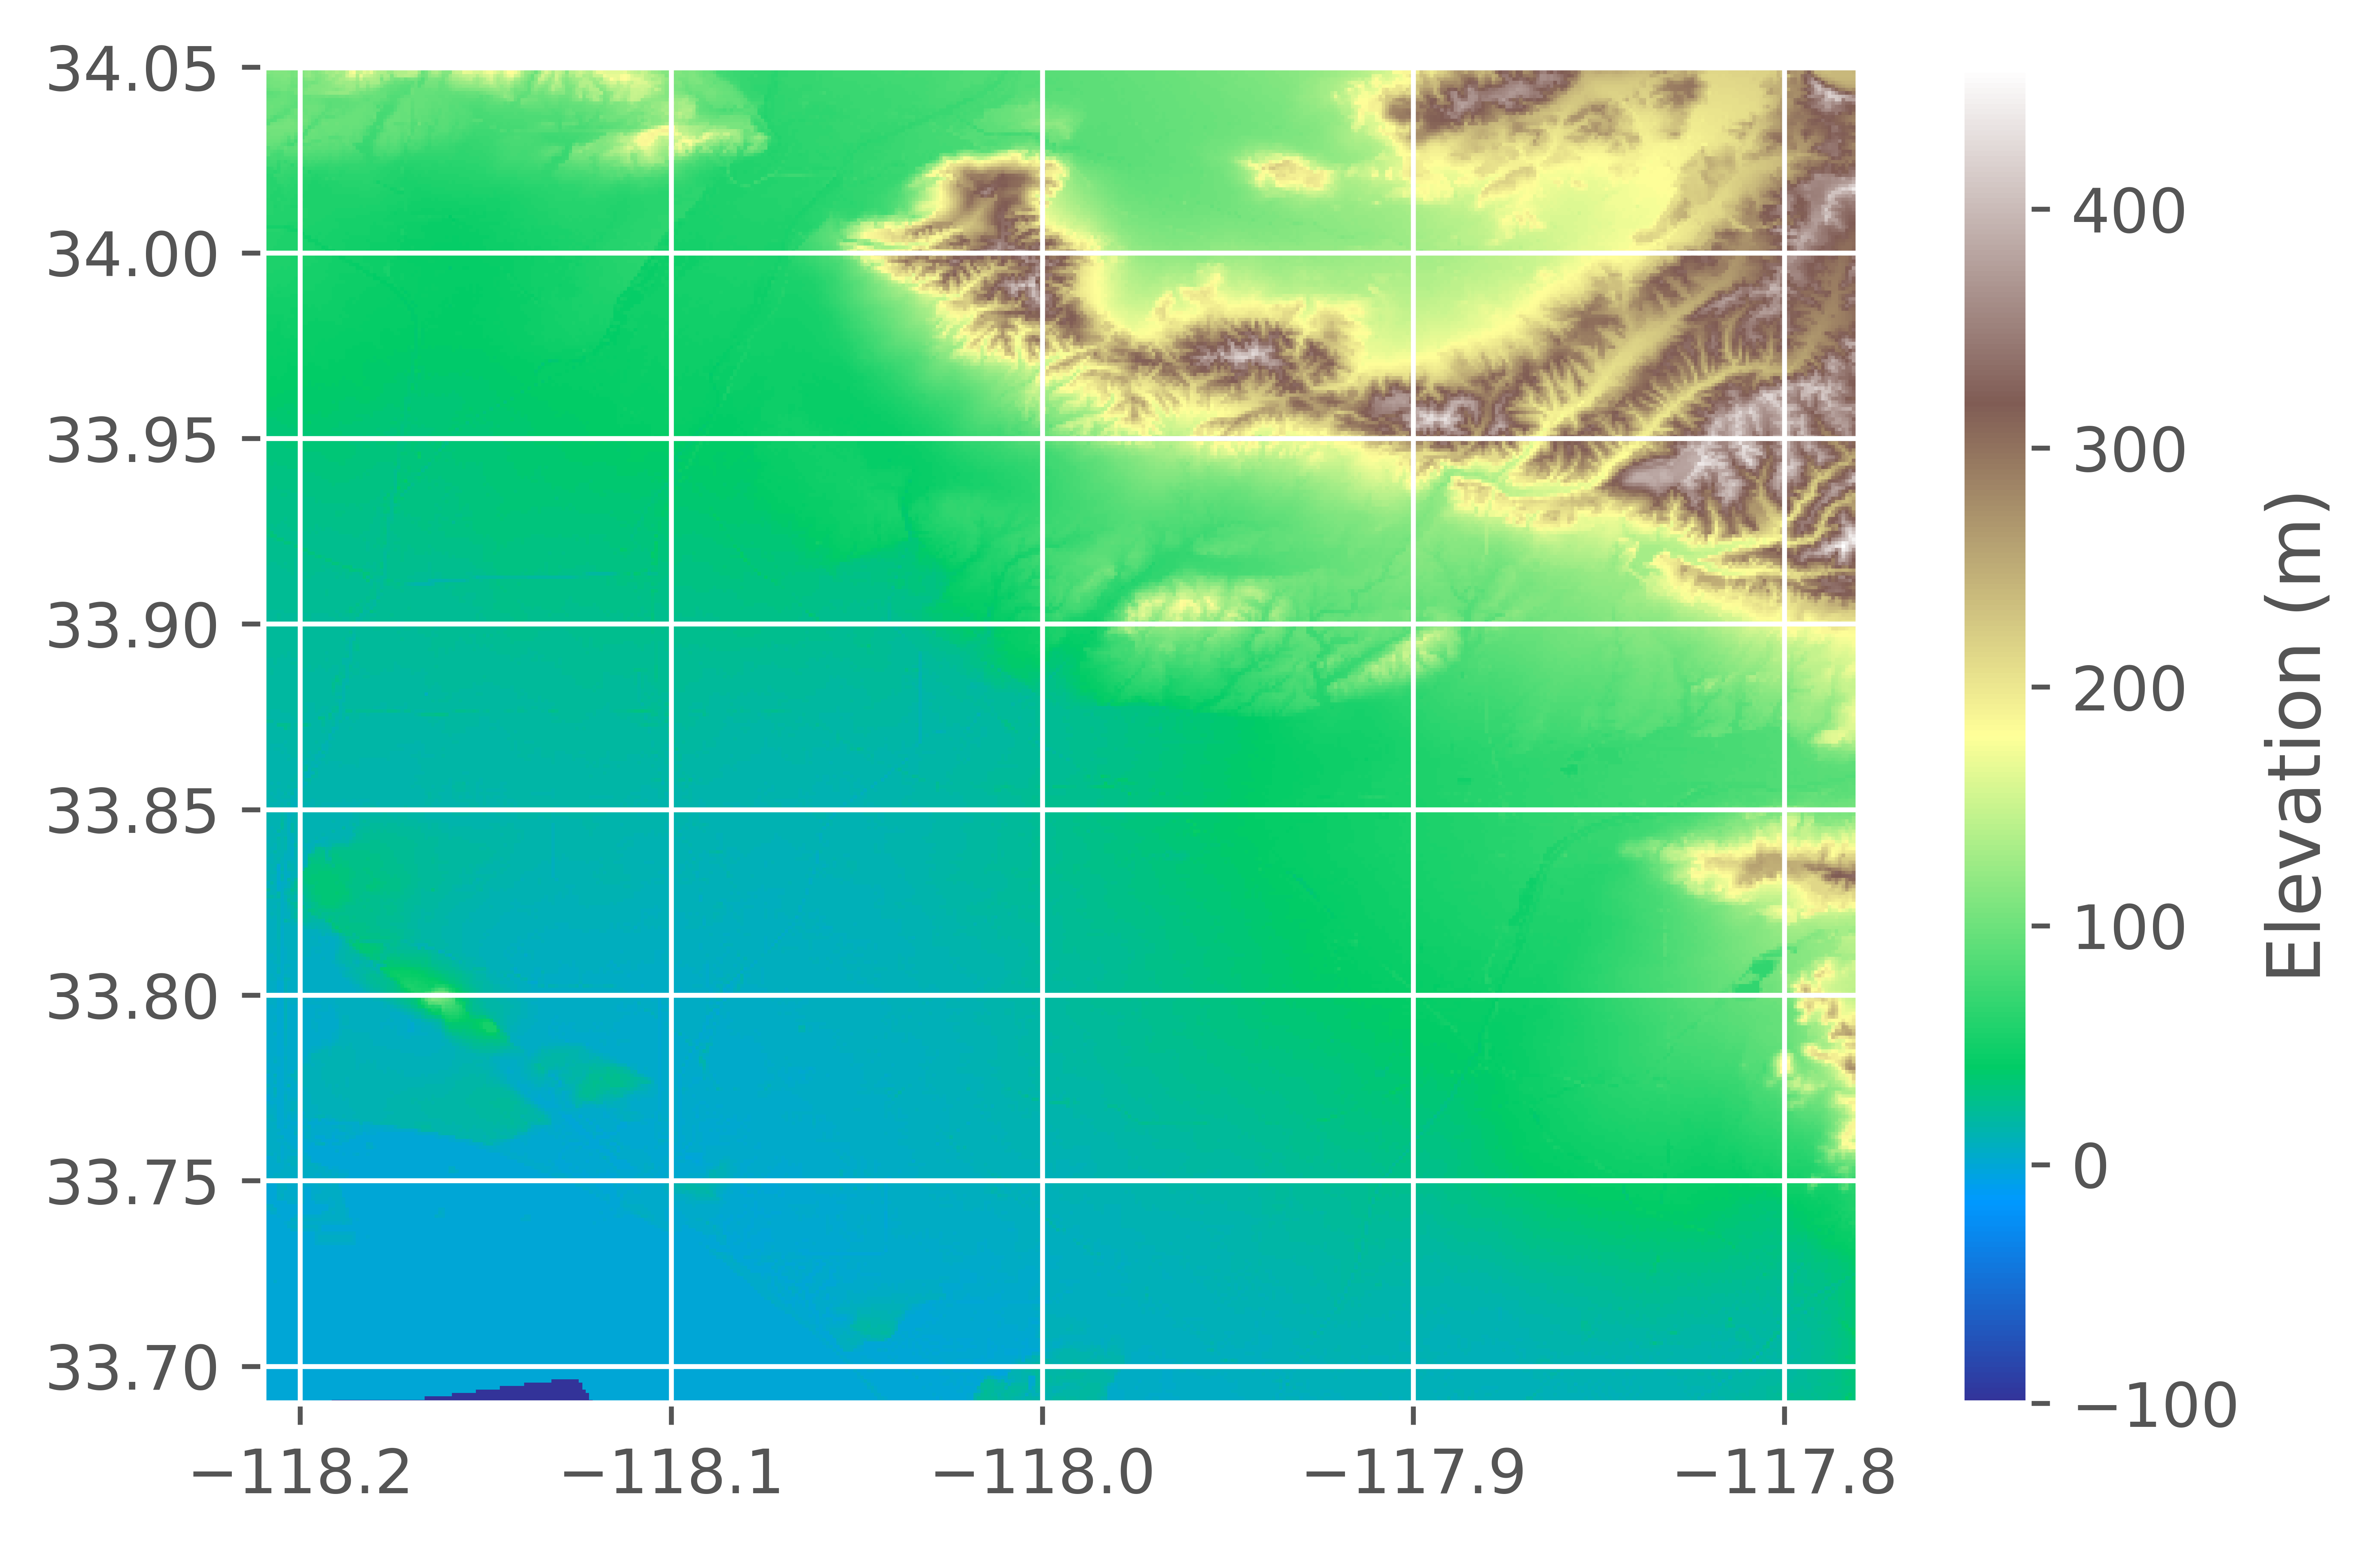

In [13]:
vmin = np.min(dem)
vmax = np.max(dem)
fig, ax = plt.subplots(dpi=600)
plt.imshow(dem[0::10, 0::10], cmap='terrain', 
           extent=[left, right, bot, top], vmin=-100, vmax=vmax)
cb = plt.colorbar()
cb.ax.set_ylabel('Elevation (m)')

In [ ]:
p = subprocess.Popen('grep -hnr "_Bounding_Coordinate" USGS_NED_13_n34w117_IMG_meta.txt | cut -d ":" -f 3', shell=True,
                stdout=subprocess.PIPE)
y = p.stdout.readlines()
west, east, north, south = (float(re.findall(r'-*\d+.\d+', x.decode('UTF-8'))[0]) for x in y)
print(west, east, north, south)
with open('USGS_NED_13_n34w117_IMG_meta.txt', 'r') as fh:
    lines = fh.readlines()
    matched_lines = [line for line in lines if "Row_Count" in line]
    nx = int(re.findall(r'\d+', matched_lines[0])[0])
    matched_lines = [line for line in lines if "Column_Count" in line]
    ny = int(re.findall(r'\d+', matched_lines[0])[0])
print(f"nx = {nx}, ny = {ny}")

In [4]:
p = subprocess.Popen('grep -hnr "_Bounding_Coordinate" USGS_NED_13_n34w118_IMG_meta.txt | cut -d ":" -f 3', shell=True,
                stdout=subprocess.PIPE)
y = p.stdout.readlines()
west, east, north, south = (float(re.findall(r'-*\d+.\d+', x.decode('UTF-8'))[0]) for x in y)
print(west, east, north, south)
with open('USGS_NED_13_n34w117_IMG_meta.txt', 'r') as fh:
    lines = fh.readlines()
    matched_lines = [line for line in lines if "Row_Count" in line]
    nx = int(re.findall(r'\d+', matched_lines[0])[0])
    matched_lines = [line for line in lines if "Column_Count" in line]
    ny = int(re.findall(r'\d+', matched_lines[0])[0])
print(f"nx = {nx}, ny = {ny}")

-118.000555556 -116.999444444 34.0005555558 32.9994444436
nx = 10812, ny = 10812


In [15]:
print(arr1.shape)
print(arr2.shape)
print(arr3.shape)
print(arr4.shape)
print(dem.shape)

(3461, 2382)
(3461, 2165)
(545, 2165)
(545, 2382)
(4006, 4547)
